In [96]:
library(dplyr)
library(ggplot2)
library(lemon)

preds <- read.csv('/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts/experiments/bmj_manuscript/bootstrap_standard_eval_new.csv')
df_to_plot <- preds %>% filter(metric!='auc',metric!='auprc', metric!='loss',  metric!='ace', 
                               thresholds==0.075 |  thresholds==0.2, 
                               model_type!='EO1', model_type!='EO2',model_type!='EO4')
df_error <- df_to_plot %>% filter(metric=='impl_threshold') %>% mutate(CI_med = CI_med-thresholds, 
                                                          CI_lower = CI_lower-thresholds,
                                                          CI_upper = CI_upper-thresholds,
                                                          metric='threshold_error')

a <- bind_rows(df_to_plot, df_error) %>%
     mutate(yline = ifelse(metric=='impl_threshold', thresholds,
                     ifelse(metric=='threshold_error', 0, NA)
                          ),
            group = as.character(group)
           )

a$model_type <- a$model_type %>% recode(EO3='EO') %>%  factor(
                                levels=c("PCE", "rPCE", "UC", "rUC", "EO")
                               )

#a$group <- as.character(a$group)

a$metric <- recode(a$metric, sensitivity = "Sensitivity", specificity = "Specificity",
                   impl_threshold = "Implied\nThreshold", threshold_error = "Threshold Calibration Error") %>% 
            factor(levels=c("Sensitivity", "Specificity", "Implied\nThreshold", "Threshold Calibration Error"))

a$threshold <- paste("t =", as.character(a$threshold*100), "%") %>% factor(levels=c("t = 7.5 %", "t = 20 %"))

a <- a %>% filter(metric!="Implied\nThreshold")
b <- a %>% filter(metric=="Threshold Calibration Error")
c <- a %>% filter(metric!="Threshold Calibration Error")

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [102]:
group_settings = scale_color_manual(labels = c("Black women", "White women", "Black men", "White men", "Overall"), 
                                    values=c("red", "green", "orange", "blue", "black"))

theme_settings = theme_bw()+ theme(axis.title = element_text(size = rel(1.75)),
      axis.title.y = element_blank(),
      axis.title.x = element_blank(),
      strip.text.x = element_text(size = rel(1.35)),
      strip.text.y = element_text(size = rel(1.2)),
      strip.background = element_blank(),
      strip.placement = "outside",
      axis.text.x = element_text(angle = 45, vjust=0.95, hjust=1),
      axis.text = element_text(size=rel(1), color='black'),
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(),
      #panel.border = element_blank(),
      axis.line = element_line(color='black'),
      legend.text=element_text(size=rel(0.85)),
      legend.position='bottom'
     )

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [123]:

theme_settings1 = theme_bw()+ theme(axis.title = element_text(size = rel(2.5)),
      axis.title.y = element_blank(),
      axis.title.x = element_blank(),
      strip.text.x = element_text(size = rel(2)),
      strip.text.y = element_text(size = rel(2)),
      strip.background = element_blank(),
      strip.placement = "outside",
      axis.text.x = element_text(angle = 45, vjust=0.95, hjust=1),
      axis.text = element_text(size=rel(1.5), color='black'),
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(),
      #panel.border = element_blank(),
      axis.line = element_line(color='black'),
      legend.text=element_text(size=rel(1)),
      legend.position='bottom'
     )


Warning message:
“Removed 100 rows containing missing values (geom_hline).”

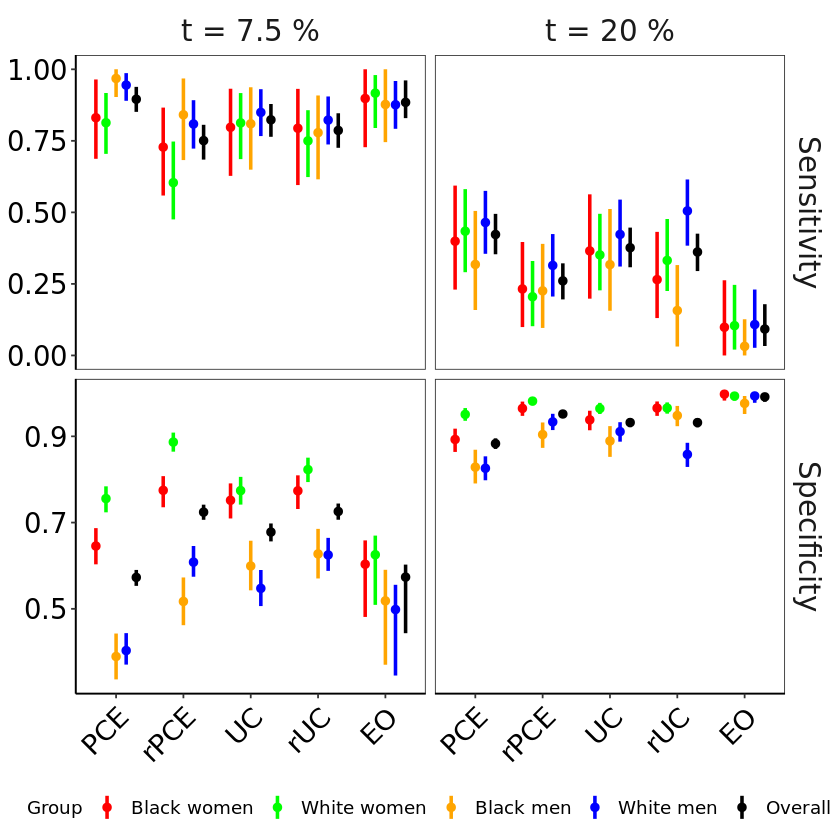

In [124]:
h = ggplot(data=c, aes(model_type, CI_med, color=group)
          ) + 
    geom_point(position=position_dodge(width=0.75), size=2
              ) +
    geom_linerange(
        aes(ymin=CI_lower, ymax=CI_upper),
        size=1,
        position=position_dodge(width=0.75)
    ) +
    theme(aspect.ratio = 0.2)
h +

facet_grid(rows=vars(metric),
           cols=vars(threshold),
           scales = "free",
    ) +
theme_settings1+

labs(
    y='Performance',
    color = "Group"
) +
group_settings +
geom_hline(aes(yintercept=yline), color='black', linetype='dashed', size=0.5, alpha=0.5)


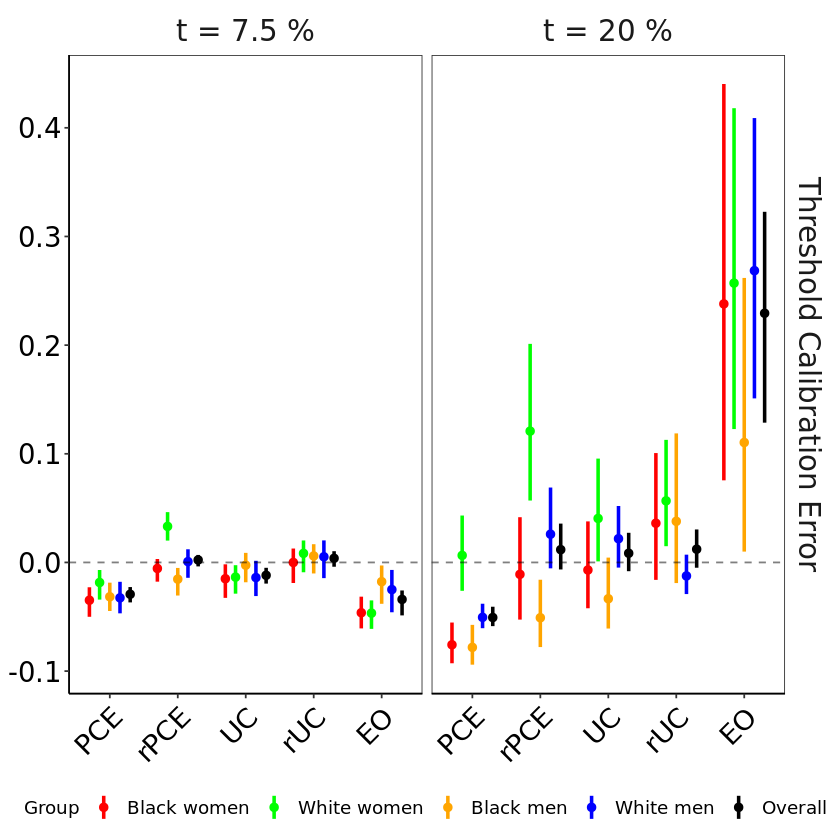

In [125]:

h = ggplot(data=b, aes(model_type, CI_med, color=group)
          ) + 
    geom_point(position=position_dodge(width=0.75), size=2
              ) +
    geom_linerange(
        aes(ymin=CI_lower, ymax=CI_upper),
        size=1,
        position=position_dodge(width=0.75)
    ) #+
    #theme(aspect.ratio = 0.2)

h +

facet_grid(rows=vars(metric),
           cols=vars(threshold),
           scales = "free",
    ) +
theme_settings1+

labs(
    y='Performance',
    color = "Group"
) +
group_settings +
geom_hline(aes(yintercept=yline), color='black', linetype='dashed', size=0.5, alpha=0.5) #+
# guides(fill = guide_legend(nrow = 2))


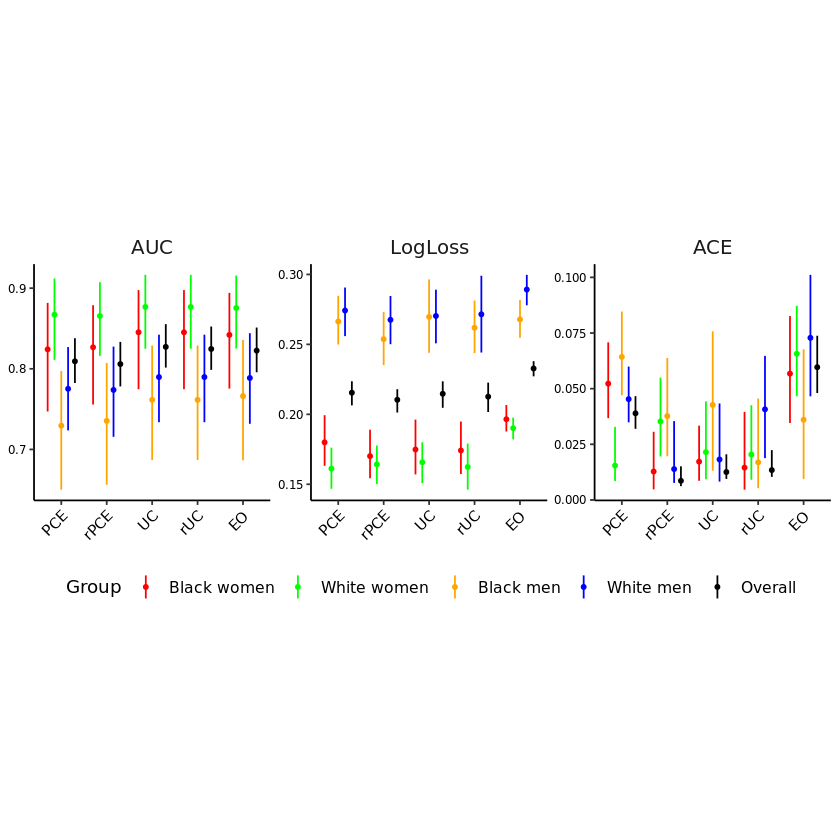

In [68]:
df_to_plot1 <- preds %>% filter(metric=='auc' | metric=='loss' |  metric=='ace',
                               model_type!='EO1', model_type!='EO2',model_type!='EO4')


df_to_plot1$model_type <- df_to_plot1$model_type %>% recode(EO3='EO') %>%  factor(
                                #levels=c("PCE", "rPCE", "BL", "rBL", "EO")
                                levels=c("PCE", "rPCE", "UC", "rUC", "EO")
                               )

df_to_plot1$group <- as.character(df_to_plot1$group)

df_to_plot1$metric <- recode(df_to_plot1$metric, auc = "AUC", loss = "LogLoss",
                   ace = "ACE", ace_bin = "Binned ACE") %>% 
            factor(levels=c("AUC", "LogLoss", "ACE", "Binned ACE"))



ggplot(data=df_to_plot1, aes(model_type, CI_med, color=group)) + 


geom_point(position=position_dodge(width=0.75), size=1) +


geom_linerange(
    aes(ymin=CI_lower, ymax=CI_upper),
    size=0.5,
    position=position_dodge(width=0.75)
        )+

lemon::facet_rep_wrap(
facets=vars(metric),
           nrow = 1,
           ncol = 3,
           scales = "free"

        ) +

theme_bw() +
        #ggsci::scale_color_d3() +
theme(axis.title = element_text(size = rel(1.75)),
      axis.title.y = element_blank(),
      axis.title.x = element_blank(),
      #strip.text.x = element_blank(),
      strip.text.x = element_text(size = rel(1.35)),
      #strip.text.y = element_text(size = rel(1.2)),
      strip.background = element_blank(),
      strip.placement = "outside",
      axis.text.x = element_text(angle = 45, vjust=0.95, hjust=1, size=rel(1)),
      axis.text.y = element_text(size=rel(0.8)),
      axis.text = element_text(color='black'),
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(),
      panel.border = element_blank(),
      axis.line = element_line(color='black'),
      legend.text=element_text(size=rel(0.85)),
      legend.position='bottom',
      aspect.ratio = 1
     ) +

labs(
    y='Performance',
    color = "Group"
) +
group_settings



In [75]:
preds <- read.csv('/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts/experiments/bmj_manuscript/bootstrap_standard_eval_new.csv')
df_to_plot2 <- preds %>% filter(metric!='auc',metric!='auprc', metric!='loss',  metric!='ace', 
                               thresholds==0.075 |  thresholds==0.2)
df_error2 <- df_to_plot2 %>% filter(metric=='impl_threshold') %>% mutate(CI_med = CI_med-thresholds, 
                                                          CI_lower = CI_lower-thresholds,
                                                          CI_upper = CI_upper-thresholds,
                                                          metric='threshold_error')

d <- bind_rows(df_to_plot2, df_error2) %>%
     mutate(yline = ifelse(metric=='impl_threshold', thresholds,
                     ifelse(metric=='threshold_error', 0, NA)
                          ),
            group = as.character(group)
           )

d$model_type <- d$model_type %>%  factor(
                                levels=c("PCE", "rPCE", "UC", "rUC", "EO1", "EO2", "EO3", "EO4")
                               )

#a$group <- as.character(a$group)

d$metric <- recode(d$metric, sensitivity = "Sensitivity", specificity = "Specificity",
                   impl_threshold = "Implied\nThreshold", threshold_error = "Threshold\nCalibration Error") %>% 
            factor(levels=c("Sensitivity", "Specificity", "Implied\nThreshold", "Threshold\nCalibration Error"))

d$threshold <- paste("t =", as.character(d$threshold*100), "%") %>% factor(levels=c("t = 7.5 %", "t = 20 %"))

d <- d %>% filter(metric!="Implied\nThreshold")
e <- d %>% filter(metric=="Threshold\nCalibration Error")
f <- d %>% filter(metric!="Threshold\nCalibration Error")

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [74]:
preds$model_type %>% unique

[1] EO1  EO2  EO3  EO4  UC   PCE  rUC  rPCE
Levels: EO1 EO2 EO3 EO4 PCE rPCE rUC UC

Warning message:
“Removed 160 rows containing missing values (geom_hline).”

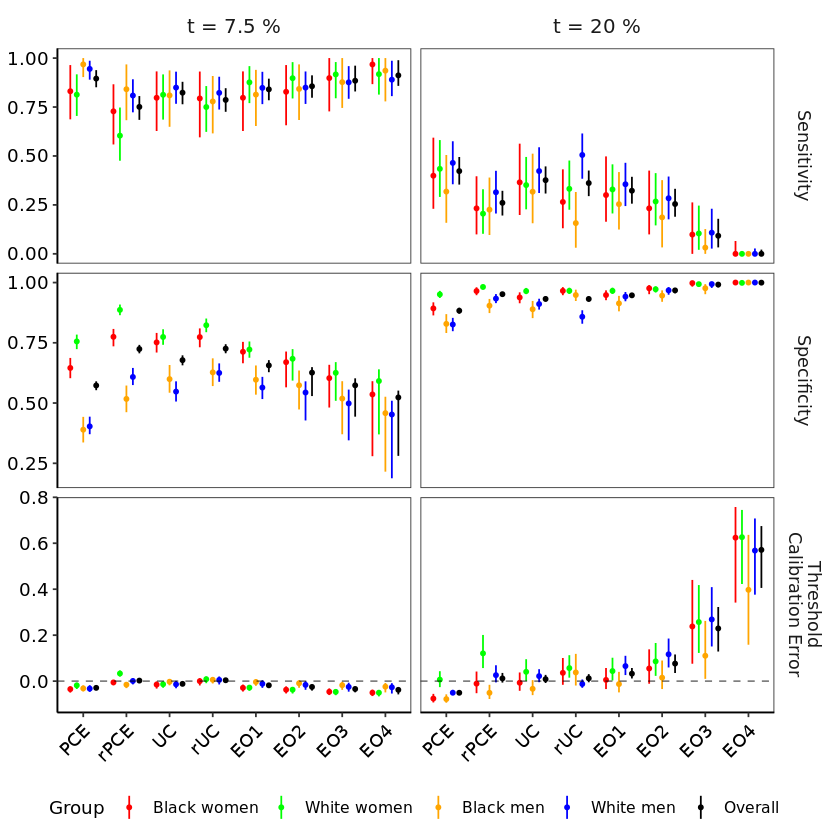

In [76]:
h = ggplot(data=d, aes(model_type, CI_med, color=group)
          ) + 
    geom_point(position=position_dodge(width=0.75), size=1
              ) +
    geom_linerange(
        aes(ymin=CI_lower, ymax=CI_upper),
        size=0.5,
        position=position_dodge(width=0.75)
    ) +
    theme(aspect.ratio = 0.2)

h +

facet_grid(rows=vars(metric),
           cols=vars(threshold),
           scales = "free",
    ) +
theme_settings+

labs(
    y='Performance',
    color = "Group"
) +
group_settings +
geom_hline(aes(yintercept=yline), color='black', linetype='dashed', size=0.5, alpha=0.5)


In [ ]:
# geom_errorbar(
#     aes(ymin=CI_lower, ymax=CI_upper), 
#     size=0.5,
#     position=position_dodge(width=0.75)
# ) +

# facet_wrap(facets=vars(thresholds,metric),
#            nrow = 2,
#            ncol = 4,
#            scales = "free"
#           ) +

#         lemon::facet_rep_wrap(
#             rows = vars(metric), 
#             cols=vars(eval_attribute), 
#             scales='free',
#             switch='y',

#         ) +